## 1.

In [7]:
import scipy
from scipy import stats

In [8]:
stats.t.ppf(0.025,13)  ##critical t value

-2.160368656461013

In [9]:
metro = [3,7,25,10,15,6,12,25,7]
rural = [48,44,40,38,33,21,20,12,1,18]
stats.ttest_ind(metro,rural,equal_var=False)

Ttest_indResult(statistic=-2.755129315234119, pvalue=0.015590196877063076)

## 2.

In [11]:
import scipy
from scipy import stats

In [14]:
karl = [1.186,1.151,1.322,1.339,1.200,1.402,1.365,1.537,1.559]
leh = [1.061,0.992,1.0631,1.062,1.065,1.178,1.037,1.086,1.052]
stats.ttest_rel(karl,leh)

Ttest_relResult(statistic=6.081630507617584, pvalue=0.00029539620888773465)

## 3.

In [15]:
import pandas as pd
import numpy
import math
from scipy import stats

In [23]:
def two_samp_proportion(p1,p2,n1,n2):
    p_pool = ((p1*n1)+(p2*n2))/(n1+n2)
    x = (p_pool*(1-p_pool)*((1/n1)+(1/n2)))
    s = math.sqrt(x)
    z = (p1-p2)/s
    if z < 0:
        p_val = stats.norm.cdf(z)
    else:
        p_val = 1-stats.norm.cdf(z)
    return z,p_val*2

In [24]:
two_samp_proportion(0.27,0.19,100,100)

(1.3442056254198995, 0.17888190308175567)

In [25]:
stats.norm.cdf(1.34442056254198995)

0.9105937859020108

## 4. Finding F - values using python

In [26]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import scipy
scipy.stats.f.ppf(q=1-0.05,dfn=15,dfd=10)

2.8450165269958436

In [27]:
scipy.stats.f.ppf(q=0.05,dfn=15,dfd=10)

0.3931252536255495

## 5. F-TEST example:

In [33]:
import numpy as np
from scipy import stats

In [34]:
x = [3,7,25,10,15,6,12,25,15,7]
y = [48,44,40,38,33,21,20,12,1,18]

In [35]:
F = np.var(x)/np.var(y)
dfn = len(x)-1
dfd = len(y)-1
p_value = scipy.stats.f.cdf(F,dfn,dfd)
p_value

0.024680183438910465

## 6. 

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import math

In [38]:
def samplesize(alpha,beta,mu1,mu2,sigma):
    z1 = -1*stats.norm.ppf(alpha)
    z2 = -1*stats.norm.ppf(beta)
    n = (((z1+z2)**2)*(sigma**2))/((mu1-mu2)**2)
    print(n)
samplesize(0.05,0.1,12,12.75,3.2)

155.900083325938


## 7. 

In [41]:
import matplotlib.pyplot as plt

In [42]:
fivepercent = [7,8,15,11,9,10]
tenpercent = [12,17,13,18,19,15]
fifteenpercent = [14,18,19,17,16,18]
twentypercent = [19,25,22,23,18,20]

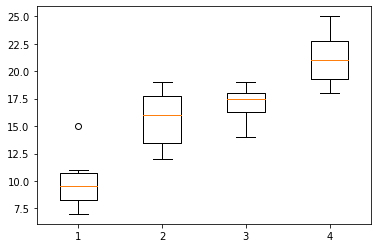

In [43]:
box_plot_data = [fivepercent,tenpercent,fifteenpercent,twentypercent]
plt.boxplot(box_plot_data)
plt.show()

## 8. 

In [44]:
scipy.stats.f.ppf(1-0.01,dfn=3,dfd=20)

4.938193382310539

In [45]:
scipy.stats.f_oneway(fivepercent,tenpercent,fifteenpercent,twentypercent)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

In [58]:
import pandas as pd
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [59]:
df = pd.read_excel('F:\DATA ANALYTICS WITH PYTHON\Tensile strength of paper.xlsx')
df

,hardwood concentration 5%,hardwood concentration 10%,hardwood concentration 15%,hardwood concentration 20%
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [60]:
data_r1 = pd.melt(df.reset_index(),id_vars=['index'],
                  value_vars=['hardwood concentration 5%','hardwood concentration 10%','hardwood concentration 15%','hardwood concentration 20%'])
data_r1.columns = ['index','treatments','value']
model = ols('value ~C(treatments)',data=data_r1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Sat, 02 May 2020   Prob (F-statistic):           3.59e-06
Time:                        15:40:02   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      15.6667      1.041     15.042      0.000      13.494      17.839
C(treatments)[T.hardwood concentration 15%]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(treatments)[T.hardwood concentration 20%]     5.5000      1.473      3.734      0.001       2.428       8.572
C(treatments)[T.hardwood concentration 5%]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
aov_table = sm.stats.anova_lm(model,type=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


## 9.

In [67]:
import math
t = -1*scipy.stats.t.ppf(0.025,20)
n = 6
MSE = 6.508333
lsd = t*math.sqrt(2*MSE/n)
lsd

3.072422588325206

## USING Tukey-Kramer Test for post HOC analysis: 

In [74]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data_r1['value'],data_r1['treatments'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
hardwood concentration 10%,hardwood concentration 15%,1.3333,0.7827,-2.7894,5.4561,False
hardwood concentration 10%,hardwood concentration 20%,5.5,0.0066,1.3773,9.6227,True
hardwood concentration 10%,hardwood concentration 5%,-5.6667,0.0051,-9.7894,-1.5439,True
hardwood concentration 15%,hardwood concentration 20%,4.1667,0.047,0.0439,8.2894,True
hardwood concentration 15%,hardwood concentration 5%,-7.0,0.001,-11.1227,-2.8773,True
hardwood concentration 20%,hardwood concentration 5%,-11.1667,0.001,-15.2894,-7.0439,True


## 10.

In [75]:
import pandas as pd
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [77]:
df3 = pd.read_excel('F:\DATA ANALYTICS WITH PYTHON\cotton weight.xlsx')
df3

,cotwt.15,cotwt.20,cotwt.25,cotwt.30,cotwt.35
0,7,12,14,19,7
1,7,17,18,25,10
2,15,12,18,22,11
3,11,18,19,19,15
4,9,18,19,23,11


In [79]:
data1 = pd.melt(df3.reset_index(),id_vars=['index'],value_vars=['cotwt.15','cotwt.20','cotwt.25','cotwt.30','cotwt.35'])
data1.columns = ['id','treatments','value']
model = ols('value ~C(treatments)',data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     14.76
Date:                Sat, 02 May 2020   Prob (F-statistic):           9.13e-06
Time:                        15:59:01   Log-Likelihood:                -58.771
No. Observations:                  25   AIC:                             127.5
Df Residuals:                      20   BIC:                             133.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     9.8000      1.270      7.719      0.000       7.152      12.448
C(treatments)[T.cotwt.20]     5.6000      1.796      3.119      0.005       1.855       9.345
C(treatments)[T.cotwt.25]     7.8000      1.796      4.344      0.000       4.055      11.545
C(treatments)[T.cotwt.30]    11.8000      1.796      6.572      0.000       8.055      15.545
C(treatments)[T.cotwt.35]     1.0000      1.796      0.557      0.584      -2.745       4.745
==============================================================================
Omnibus:                        1.435   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                0.957
Skew:                           0.106   Prob(JB):                        0.620
Kurtosis:                       2.065   Cond. No.                         5.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data1['value'],data1['treatments'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
cotwt.15,cotwt.20,5.6,0.0385,0.2266,10.9734,True
cotwt.15,cotwt.25,7.8,0.0026,2.4266,13.1734,True
cotwt.15,cotwt.30,11.8,0.001,6.4266,17.1734,True
cotwt.15,cotwt.35,1.0,0.9,-4.3734,6.3734,False
cotwt.20,cotwt.25,2.2,0.7148,-3.1734,7.5734,False
cotwt.20,cotwt.30,6.2,0.0189,0.8266,11.5734,True
cotwt.20,cotwt.35,-4.6,0.1165,-9.9734,0.7734,False
cotwt.25,cotwt.30,4.0,0.2102,-1.3734,9.3734,False
cotwt.25,cotwt.35,-6.8,0.0091,-12.1734,-1.4266,True
cotwt.30,cotwt.35,-10.8,0.001,-16.1734,-5.4266,True
